<center><h1> <font color="green"><u>Visualizer</u></font> </h1></center>

<h3> <font color="purple"><u>This section includes:</u></font> </h3>

> * Data Extraction and Manipulation <br />
> * Visualization (Using **ggplot2()**) <br />

<br />

## Creating Datasets

In [1]:
# Setting the working directory
setwd("~/Documents/A-tracking-of-2019-nCoV/COVID-19/")

In [2]:
# # Loading desired libraries
library(ggplot2)
library(tidyverse)
library(lattice)

library(plyr) # used to calculate the average weight of each group 

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  2.1.1     ✔ purrr   0.3.3
✔ tidyr   1.0.2     ✔ dplyr   0.8.3
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  2.1.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The 

In [3]:
### Loading files ###

Confirmed = read.csv("ready_to_use/COVID-19/Confirmed.csv")
Deaths = read.csv("ready_to_use/COVID-19/Deaths.csv")
Recovered = read.csv("ready_to_use/COVID-19/Recovered.csv")


countryWise.bulk.summary = read.csv("ready_to_use/COVID-19/Mixed/countryWise_bulk_summary.csv")
Four.dataset.locationWise = read.csv("ready_to_use/COVID-19/FOUR/Four_dataset_locationWise.csv")

# train on 80% dates, test on 20%
dateWise.bulk.summary = read.csv("ready_to_use/COVID-19/Mixed/dateWise_bulk_summary.csv")

<br /> 
### Functions

* Cases (reported daily)

In [4]:

confirmed.till.date = function(cName, yesORno = FALSE) {
  
  
  countryWise.bulk.summary.country = countryWise.bulk.summary[
    which(str_detect(countryWise.bulk.summary$Country,
                     cName,
                     negate = yesORno)),
    ]
  
  #####################################################
  
  d <- countryWise.bulk.summary.country %>% 
    as_tibble()
  
  d_ends <- countryWise.bulk.summary.country %>% 
    group_by(Country) %>% 
    top_n(1, Day) %>% 
    pull(Confirmed)
  
  temp = as.character(countryWise.bulk.summary$Date[1:nlevels(countryWise.bulk.summary$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Confirmed, color = Country)) +
    geom_line(size = 2, alpha = .8) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Few(specify type of such countries) reporting more deaths for the confirmed cases",
            subtitle = "Based on the dataset of given country") +
    labs(x = "Dates", y = "Confirmed", caption = "Plot by @ravi")
  
}


In [5]:

deaths.till.date = function(cName, yesORno = FALSE) {
  
  
  countryWise.bulk.summary.country = countryWise.bulk.summary[
    which(str_detect(countryWise.bulk.summary$Country,
                     cName,
                     negate = yesORno)),
    ]
  
  #####################################################
  
  d <- countryWise.bulk.summary.country %>% 
    as_tibble()
  
  d_ends <- countryWise.bulk.summary.country %>% 
    group_by(Country) %>% 
    top_n(1, Day) %>% 
    pull(Deaths)    # col can be changed
  
  temp = as.character(countryWise.bulk.summary$Date[1:nlevels(countryWise.bulk.summary$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Deaths, color = Country)) +
    geom_line(size = 2, alpha = .8) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Few(specify type of such countries) reporting more deaths for the confirmed cases",
            subtitle = "Based on the dataset of given country") +
    labs(x = "Dates", y = "Deaths", caption = "Plot by @ravi")
  
}


In [6]:

recovery.till.date = function(cName, yesORno = FALSE) {
  
  
  countryWise.bulk.summary.country = countryWise.bulk.summary[
    which(str_detect(countryWise.bulk.summary$Country,
                     cName,
                     negate = yesORno)),
    ]
  
  #####################################################
  
  d <- countryWise.bulk.summary.country %>% 
    as_tibble()
  
  d_ends <- countryWise.bulk.summary.country %>% 
    group_by(Country) %>% 
    top_n(1, Day) %>% 
    pull(Recovered)    # col can be changed
  
  temp = as.character(countryWise.bulk.summary$Date[1:nlevels(countryWise.bulk.summary$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Recovered, color = Country)) +
    geom_line(size = 2, alpha = .8) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Few(specify type of such countries) reporting more deaths for the confirmed cases",
            subtitle = "Based on the dataset of given country") +
    labs(x = "Dates", y = "Recovered", caption = "Plot by @ravi")
  
}


<br /> 
* for the World-Data

In [7]:

till.date = function(yAxis, dataSet, cName = c("Hubei", "World", "China", "Diamond Princess"), yesORno = FALSE) {
  
  get(dataSet) -> plotFrom
  
  plotFrom = plotFrom[
    which(str_detect(plotFrom$Location,
                     cName,
                     negate = yesORno)),
  ]
  
  #####################################################
  
  d <- plotFrom %>% 
    as_tibble()
  
  d_ends <- plotFrom %>% 
    group_by(Location) %>% 
    top_n(1, Day) %>% 
    pull(yAxis)    # col can be changed to    ---------->    yAxis
  
  temp = as.character(plotFrom$Date[1:nlevels(plotFrom$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Recovered, color = Location)) +
    geom_line(size = 2, alpha = .8) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Hubei, China(except Hubei) & World polt, on the daily basis.",
            subtitle = "Based on the summary dataset") +
    labs(x = "Dates", y = yAxis, caption = "Plot by @ravi")
  
}


In [8]:

till.date.Confirmed = function(lName = c("Hubei", "World", "China", "Diamond Princess"), yesORno = FALSE) {
  
  
  locationWise.bulk.summary.Four = Four.dataset.locationWise[
    which(str_detect(Four.dataset.locationWise$Location,
                     lName,
                     negate = yesORno)),
    ]
  
  #####################################################
  
  d <- locationWise.bulk.summary.Four %>% 
    as_tibble()
  
  d_ends <- locationWise.bulk.summary.Four %>% 
    group_by(Location) %>% 
    top_n(1, Day) %>% 
    pull(Confirmed)    # col can be changed
  
  temp = as.character(Four.dataset.locationWise$Date[1:nlevels(Four.dataset.locationWise$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Confirmed, color = Location)) +
    geom_line(size = 2, alpha = 0.8) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Few(specify type of such countries) reporting more deaths for the confirmed cases",
            subtitle = "Based on the dataset of given country") +
    labs(x = "Dates", y = "Confirmed", caption = "Plot by @ravi")
  
}


In [9]:

till.date.Deaths = function(lName = c("Hubei", "World", "China", "Diamond Princess"), yesORno = FALSE) {
  
  
  locationWise.bulk.summary.Four = Four.dataset.locationWise[
    which(str_detect(Four.dataset.locationWise$Location,
                     lName,
                     negate = yesORno)),
    ]
  
  #####################################################
  
  d <- locationWise.bulk.summary.Four %>% 
    as_tibble()
  
  d_ends <- locationWise.bulk.summary.Four %>% 
    group_by(Location) %>% 
    top_n(1, Day) %>% 
    pull(Deaths)    # col can be changed
  
  temp = as.character(Four.dataset.locationWise$Date[1:nlevels(Four.dataset.locationWise$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Deaths, color = Location)) +
    geom_line(size = 2, alpha = 0.8) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Few(specify type of such countries) reporting more deaths for the confirmed cases",
            subtitle = "Based on the dataset of given country") +
    labs(x = "Dates", y = "Deaths", caption = "Plot by @ravi")
  
}


In [10]:

till.date.Recovered = function(lName = c("Hubei", "World", "China", "Diamond Princess"), yesORno = FALSE) {
  
  
  locationWise.bulk.summary.Four = Four.dataset.locationWise[
    which(str_detect(Four.dataset.locationWise$Location,
                     lName,
                     negate = yesORno)),
    ]
  
  #####################################################
  
  d <- locationWise.bulk.summary.Four %>% 
    as_tibble()
  
  d_ends <- locationWise.bulk.summary.Four %>% 
    group_by(Location) %>% 
    top_n(1, Day) %>% 
    pull(Recovered)    # col can be changed
  
  temp = as.character(Four.dataset.locationWise$Date[1:nlevels(Four.dataset.locationWise$Date)])
  new = c(temp[10], temp[20], temp[30], temp[40], temp[50])
  
  d %>% 
    ggplot(aes(Day, Recovered, color = Location)) +
    geom_line(size = 2, alpha = 0.8) +
    geom_point(color = "black", alpha = 0.3) +
    theme_classic() +
    scale_x_continuous(label = new, breaks = c(10, 20, 30, 40, 50)) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = d_ends)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("Few(specify type of such countries) reporting more deaths for the confirmed cases",
            subtitle = "Based on the dataset of given country") +
    labs(x = "Dates", y = "Recovered", caption = "Plot by @ravi")
  
}


<hr /> <br /> 

### VISUALIZATIONS

* #### Line Plots

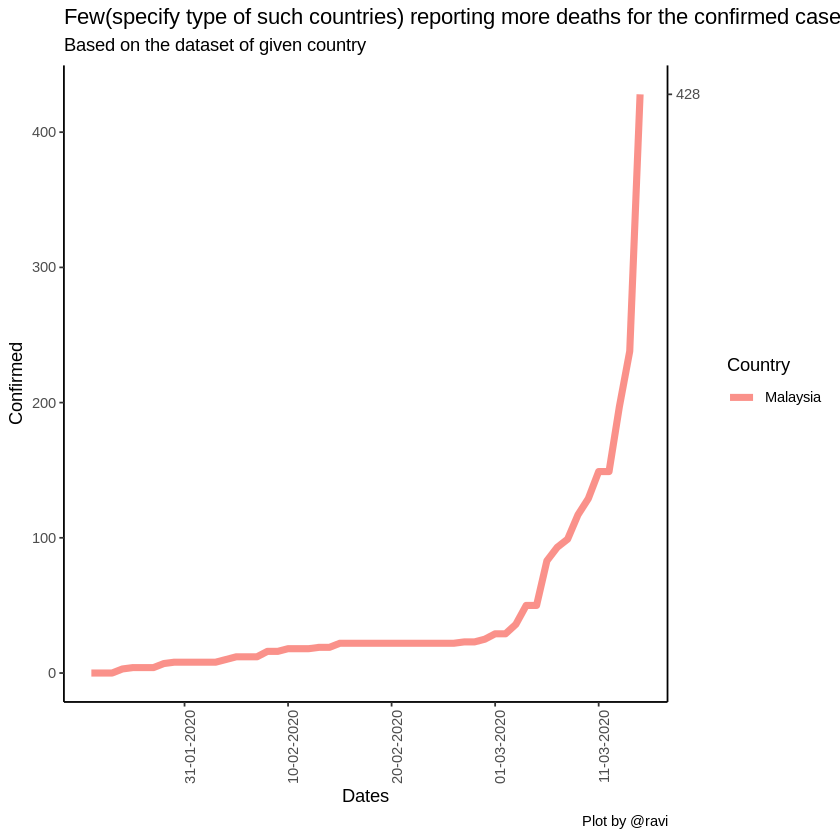

In [11]:
confirmed.till.date("Malaysia")

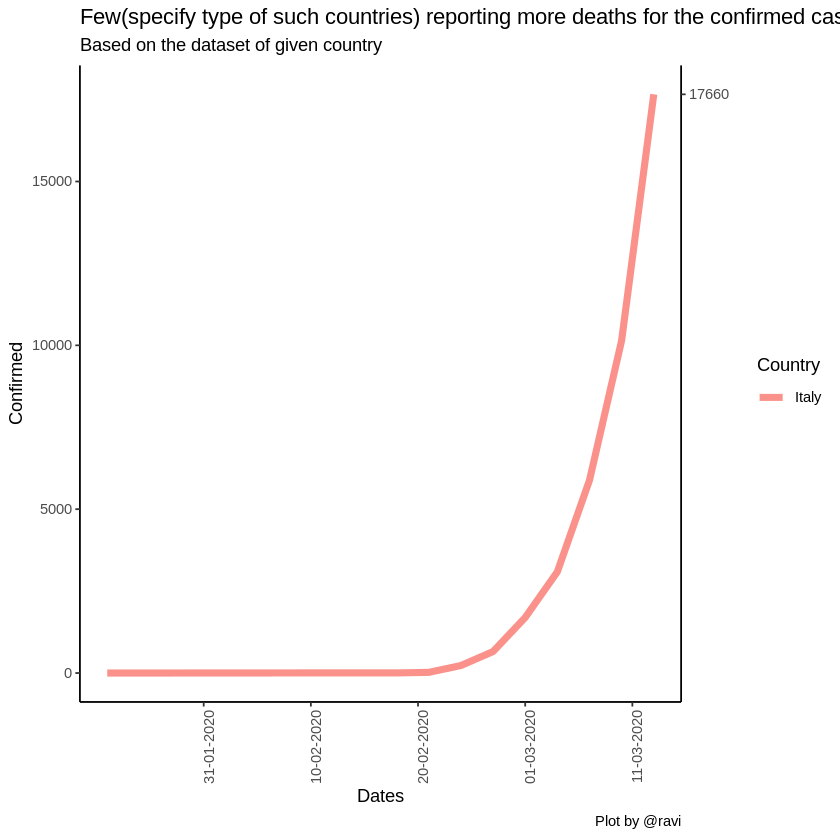

In [12]:
confirmed.till.date(c("Italy", "South Korea", "Hong Kong"), F)

<br />

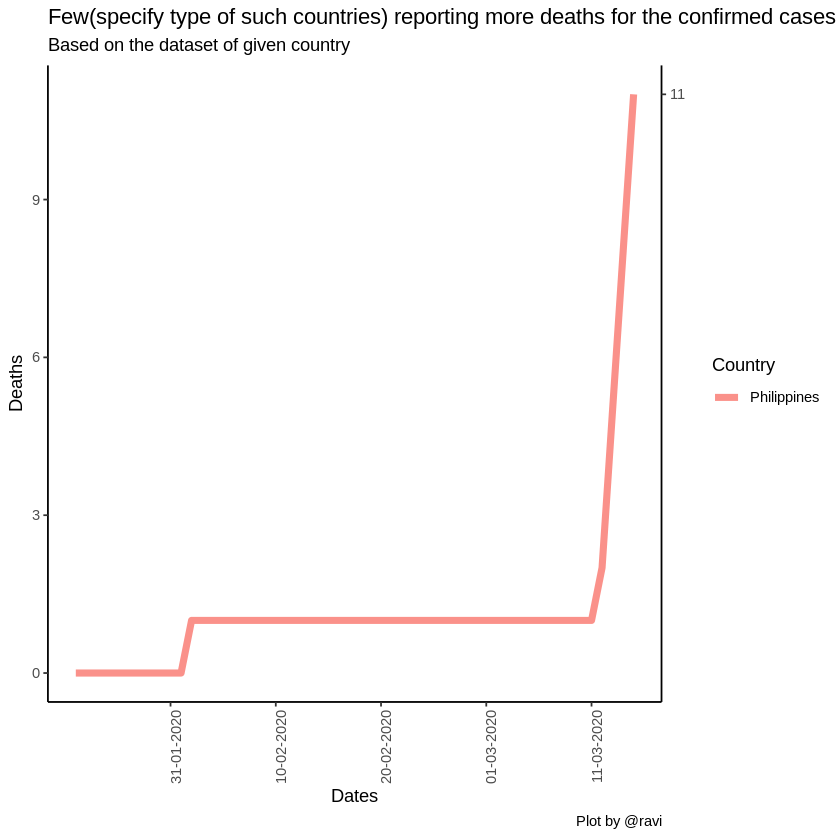

In [13]:
deaths.till.date("Philippines")

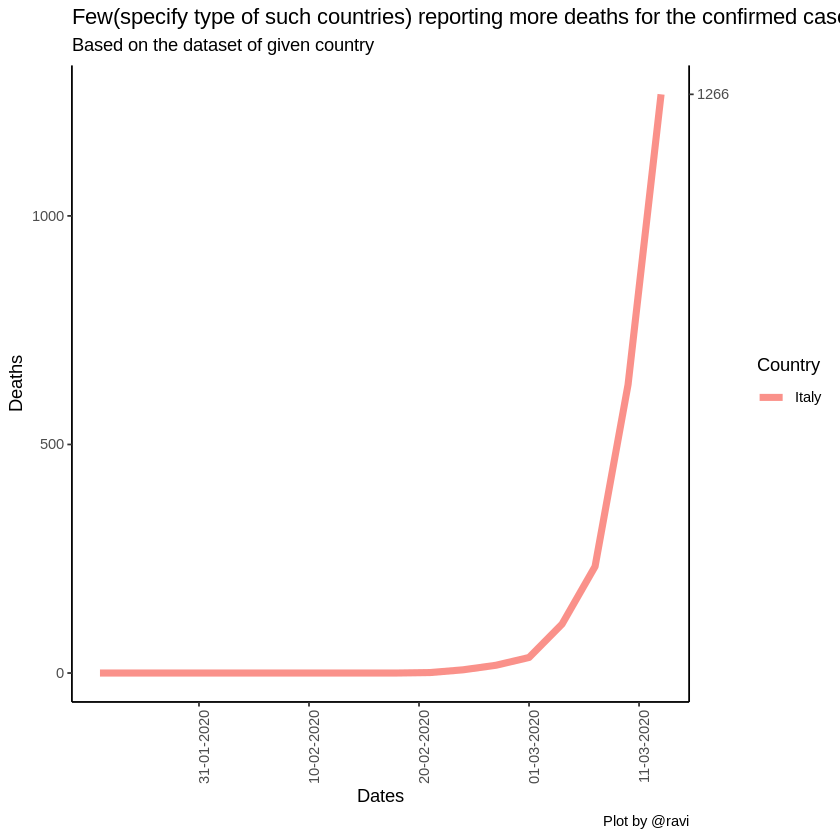

In [14]:
deaths.till.date(c("Italy", "South Korea", "Hong Kong"))

<br />

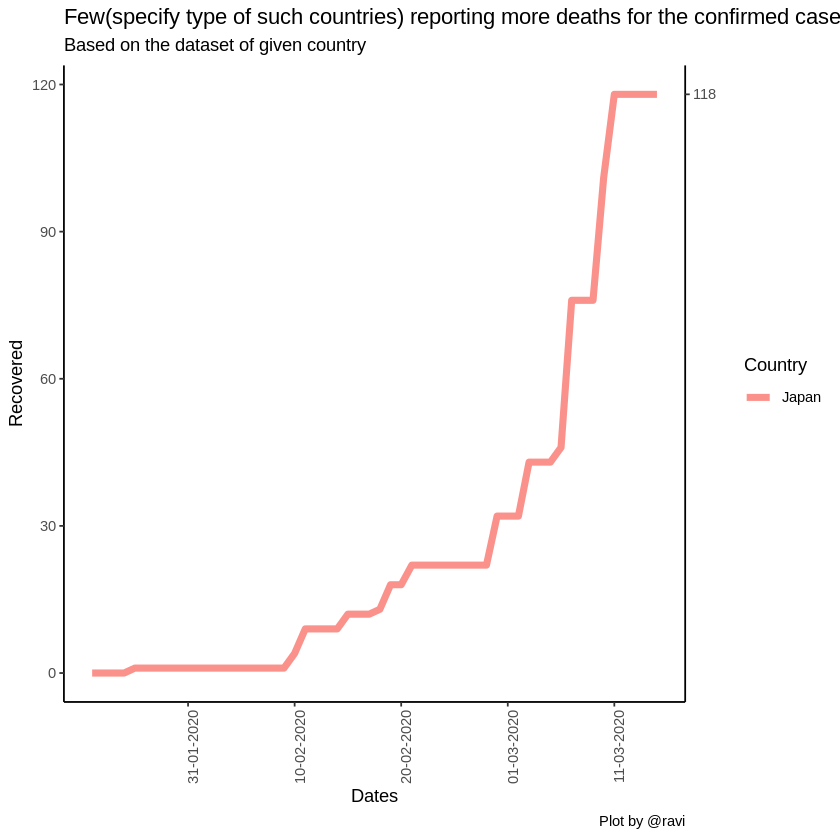

In [15]:
recovery.till.date("Japan")

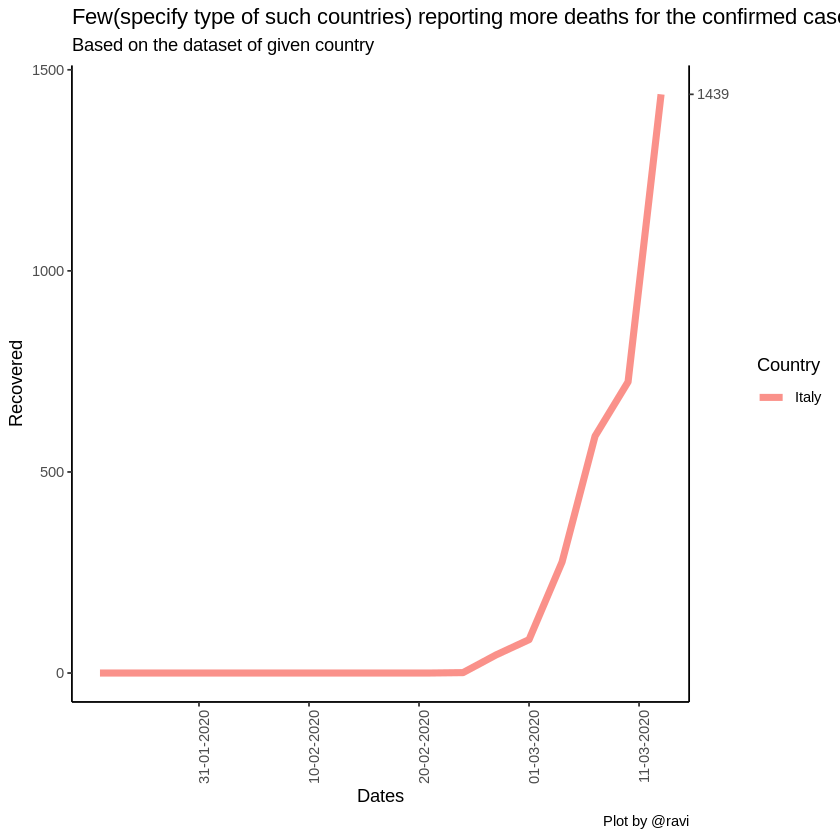

In [16]:
recovery.till.date(c("Italy", "South Korea", "Hong Kong"))

<br />

* #### BEST

In [17]:
## a Histogram or Bar plot will be better for --> Four.dataset.locationWise
head(Four.dataset.locationWise, 10)

Location,Day,Date,Confirmed,Deaths,Recovered,Active.Cases,Closed.Cases
Hubei,1,22-01-2020,444,17,28,399,45
Hubei,2,23-01-2020,444,17,28,399,45
Hubei,3,24-01-2020,549,24,31,494,55
Hubei,4,25-01-2020,761,40,32,689,72
Hubei,5,26-01-2020,1058,52,42,964,94
Hubei,6,27-01-2020,1423,76,45,1302,121
Hubei,7,28-01-2020,3554,125,80,3349,205
Hubei,8,29-01-2020,3554,125,88,3341,213
Hubei,9,30-01-2020,4903,162,90,4651,252
Hubei,10,31-01-2020,5806,204,141,5461,345


<br />

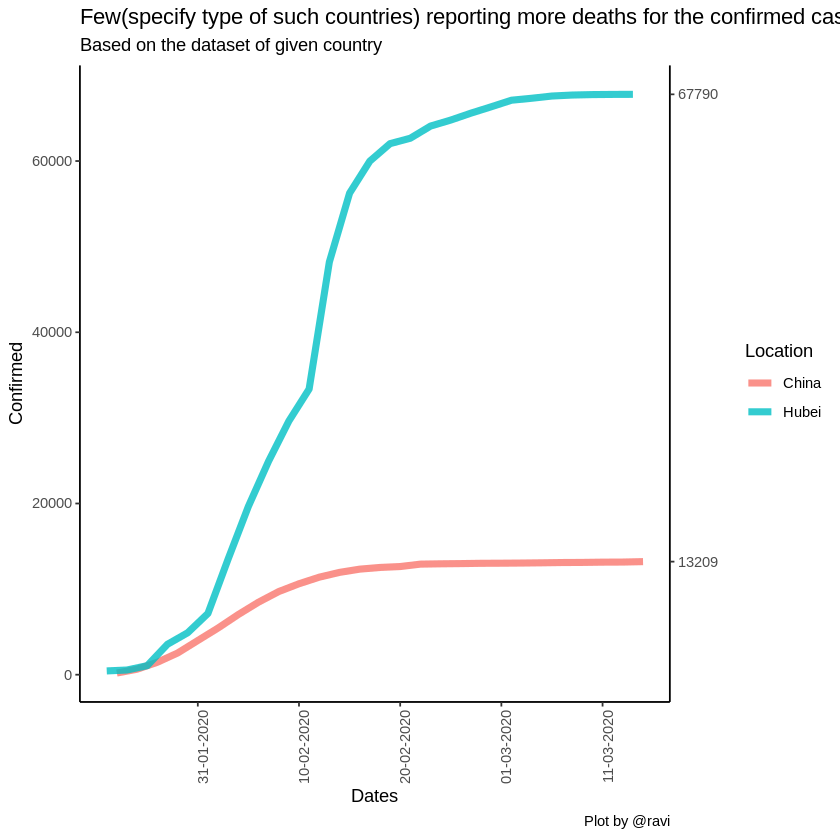

In [18]:
# Lines
till.date.Confirmed(c("Hubei", "China"))

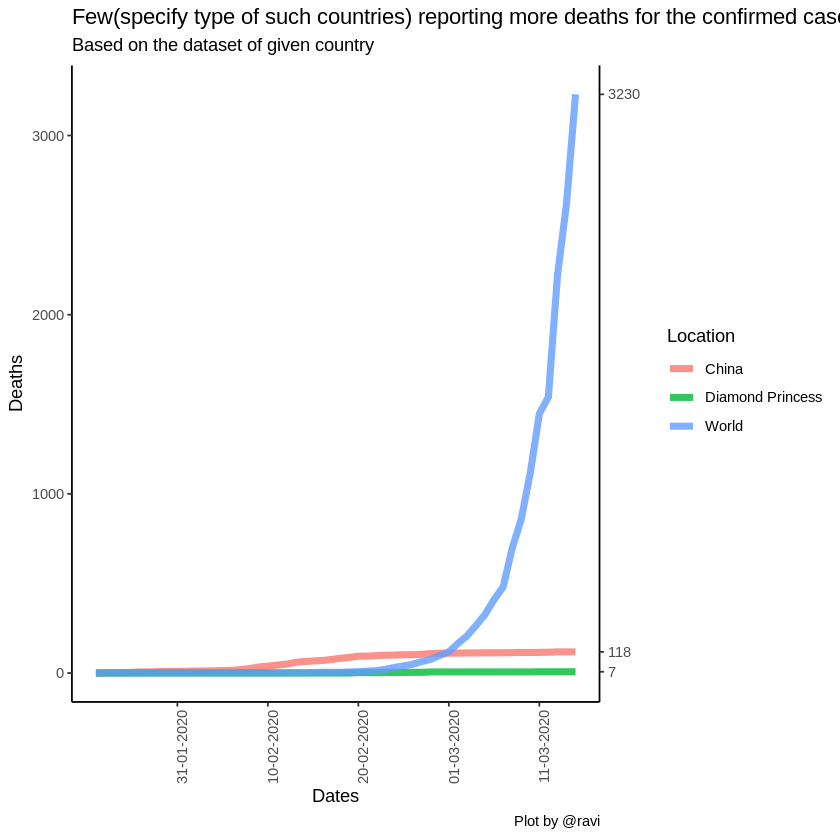

In [19]:
till.date.Deaths("Hubei", T)

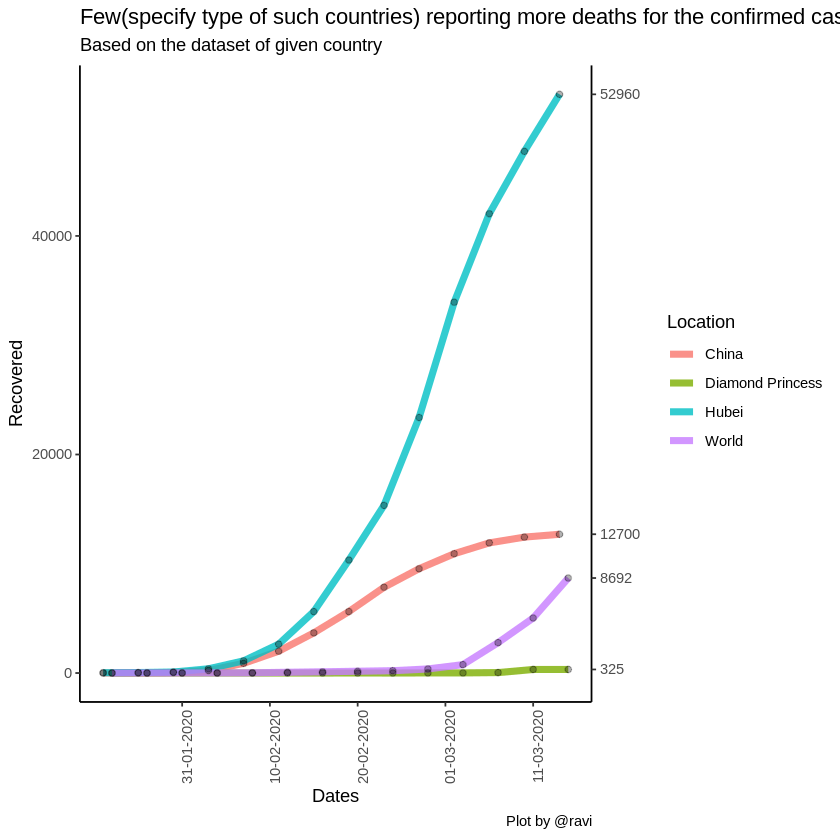

In [20]:
till.date.Recovered()

<hr /><br />